<a href="https://colab.research.google.com/github/joshua-sajeev/BB84/blob/main/Optimized_BB84_Implementation_Using_Qiskit_for_Enhanced_Key_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit_aer
!pip install qiskit_ibm_runtime

In [2]:
import qiskit
print(qiskit.__version__)

1.4.0


In [3]:
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# BASIC BB84 SIMULATION

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

In [6]:
# Function to generate a random binary string using quantum circuits
def RandomString(str_len):
    op_str = ''  # Initialize an empty output string
    num_qbits = 5  # Define number of qubits

    # Calculate the number of chunks needed
    num_chunks = math.ceil(str_len / num_qbits)
    for _ in range(num_chunks):
        # Create a quantum register and a classical register
        q = QuantumRegister(num_qbits)
        c = ClassicalRegister(num_qbits)
        QC = QuantumCircuit(q, c)

        # Apply Hadamard gates to all qubits to create superposition
        for i in range(num_qbits):
            QC.h(q[i])
        QC.measure(q, c)

        simulator = AerSimulator()
        # Measure the qubits
        circ = transpile(QC, simulator)
        result = simulator.run(circ, shots=1, memory=True).result()
        memory = result.get_memory(circ)
        op_str += memory[0]  # Append the measured result to op_str

    return op_str[:str_len]  # Return the full random string

In [9]:
len_message = 8
alice_key = "10010100"
alice_bases = "10110010"
bob_bases = "10010100"
q = QuantumRegister(len_message)
c= ClassicalRegister(len_message)
qc = QuantumCircuit(q, c)

for i in range(len_message):
   if alice_key[i] == '1':
       qc.x(q[i])
   if alice_bases[i] == '1':
       qc.h(q[i])
qc.barrier()
qc.draw()

┌───┐┌───┐ ░ 
q2_0: ┤ X ├┤ H ├─░─
      └───┘└───┘ ░ 
q2_1: ───────────░─
      ┌───┐      ░ 
q2_2: ┤ H ├──────░─
      ├───┤┌───┐ ░ 
q2_3: ┤ X ├┤ H ├─░─
      └───┘└───┘ ░ 
q2_4: ───────────░─
      ┌───┐      ░ 
q2_5: ┤ X ├──────░─
      ├───┤      ░ 
q2_6: ┤ H ├──────░─
      └───┘      ░ 
q2_7: ───────────░─
                 ░ 
c1: 8/═════════════

In [10]:
for i in range(len_message):
  if bob_bases[i] == '1':
    qc.h(q[i])
qc.measure(q, c)
qc.draw()

┌───┐┌───┐ ░ ┌───┐            ┌─┐      
q2_0: ┤ X ├┤ H ├─░─┤ H ├────────────┤M├──────
      └───┘└───┘ ░ └───┘┌─┐         └╥┘      
q2_1: ───────────░──────┤M├──────────╫───────
      ┌───┐      ░      └╥┘┌─┐       ║       
q2_2: ┤ H ├──────░───────╫─┤M├───────╫───────
      ├───┤┌───┐ ░ ┌───┐ ║ └╥┘       ║ ┌─┐   
q2_3: ┤ X ├┤ H ├─░─┤ H ├─╫──╫────────╫─┤M├───
      └───┘└───┘ ░ └───┘ ║  ║ ┌─┐    ║ └╥┘   
q2_4: ───────────░───────╫──╫─┤M├────╫──╫────
      ┌───┐      ░ ┌───┐ ║  ║ └╥┘    ║  ║ ┌─┐
q2_5: ┤ X ├──────░─┤ H ├─╫──╫──╫─────╫──╫─┤M├
      ├───┤      ░ └┬─┬┘ ║  ║  ║     ║  ║ └╥┘
q2_6: ┤ H ├──────░──┤M├──╫──╫──╫─────╫──╫──╫─
      └───┘      ░  └╥┘  ║  ║  ║ ┌─┐ ║  ║  ║ 
q2_7: ───────────░───╫───╫──╫──╫─┤M├─╫──╫──╫─
                 ░   ║   ║  ║  ║ └╥┘ ║  ║  ║ 
c1: 8/═══════════════╩═══╩══╩══╩══╩══╩══╩══╩═
                     6   1  2  4  7  0  3  5

In [11]:

# Run the circuit
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ, shots=1, memory=True).result()
bob_result = result.get_memory(circ)
print('Alice Key:', alice_key)
print('Alice Bases:', alice_bases)
print('Bob Bases:', bob_bases)
print('Bob Measurement Result:', bob_result[0])

# Display matching bits for shared key
shared_key = []
for i in range(len_message):
    if alice_bases[i] == bob_bases[i]:  # Only keep the bit if bases match
        shared_key.append(bob_result[0][len_message - i - 1])  # Reverse order in Qiskit

final_shared_key = ''.join(shared_key)
print('Final Shared Key:', final_shared_key)

# Calculate the percentage of key bits retained
matching_bits_count = len(final_shared_key)
percentage_retained = (matching_bits_count / len_message) * 100
print("Percentage of key bits retained: ", percentage_retained, "%")

Alice Key: 10010100
Alice Bases: 10110010
Bob Bases: 10010100
Bob Measurement Result: 00001001
Final Shared Key: 10100
Percentage of key bits retained:  62.5 %


## Simulating BB84 100 times

In [12]:
num_trials = 100
len_message = 8
retention_rates = []

for trial in range(num_trials):
    # Generate Alice's key and bases
    alice_key = RandomString(len_message)
    alice_bases = RandomString(len_message)

    # Build a new quantum circuit for this trial
    q = QuantumRegister(len_message)
    c = ClassicalRegister(len_message)
    qc = QuantumCircuit(q, c)

    # Alice encodes her qubits based on her key and basis
    for i in range(len_message):
        if alice_key[i] == '1':
            qc.x(q[i])
        if alice_bases[i] == '1':
            qc.h(q[i])
    qc.barrier()

    # Bob's random basis selection and measurement basis application
    bob_bases = RandomString(len_message)
    for i in range(len_message):
        if bob_bases[i] == '1':
            qc.h(q[i])
    qc.measure(q, c)

    # Run the circuit using a simulator
    simulator = AerSimulator()
    circ = transpile(qc, simulator)
    result = simulator.run(circ, shots=1, memory=True).result()
    bob_result = result.get_memory(circ)[0]  # Single-shot measurement result

    # Extract shared key from matching bases (accounting for reverse order)
    shared_key = []
    for i in range(len_message):
        if alice_bases[i] == bob_bases[i]:
            shared_key.append(bob_result[len_message - i - 1])
    final_shared_key = ''.join(shared_key)

    # Calculate retention percentage for this trial
    percentage_retained = (len(final_shared_key) / len_message) * 100
    retention_rates.append(percentage_retained)


Average Percentage of Key Bits Retained: 50.62%


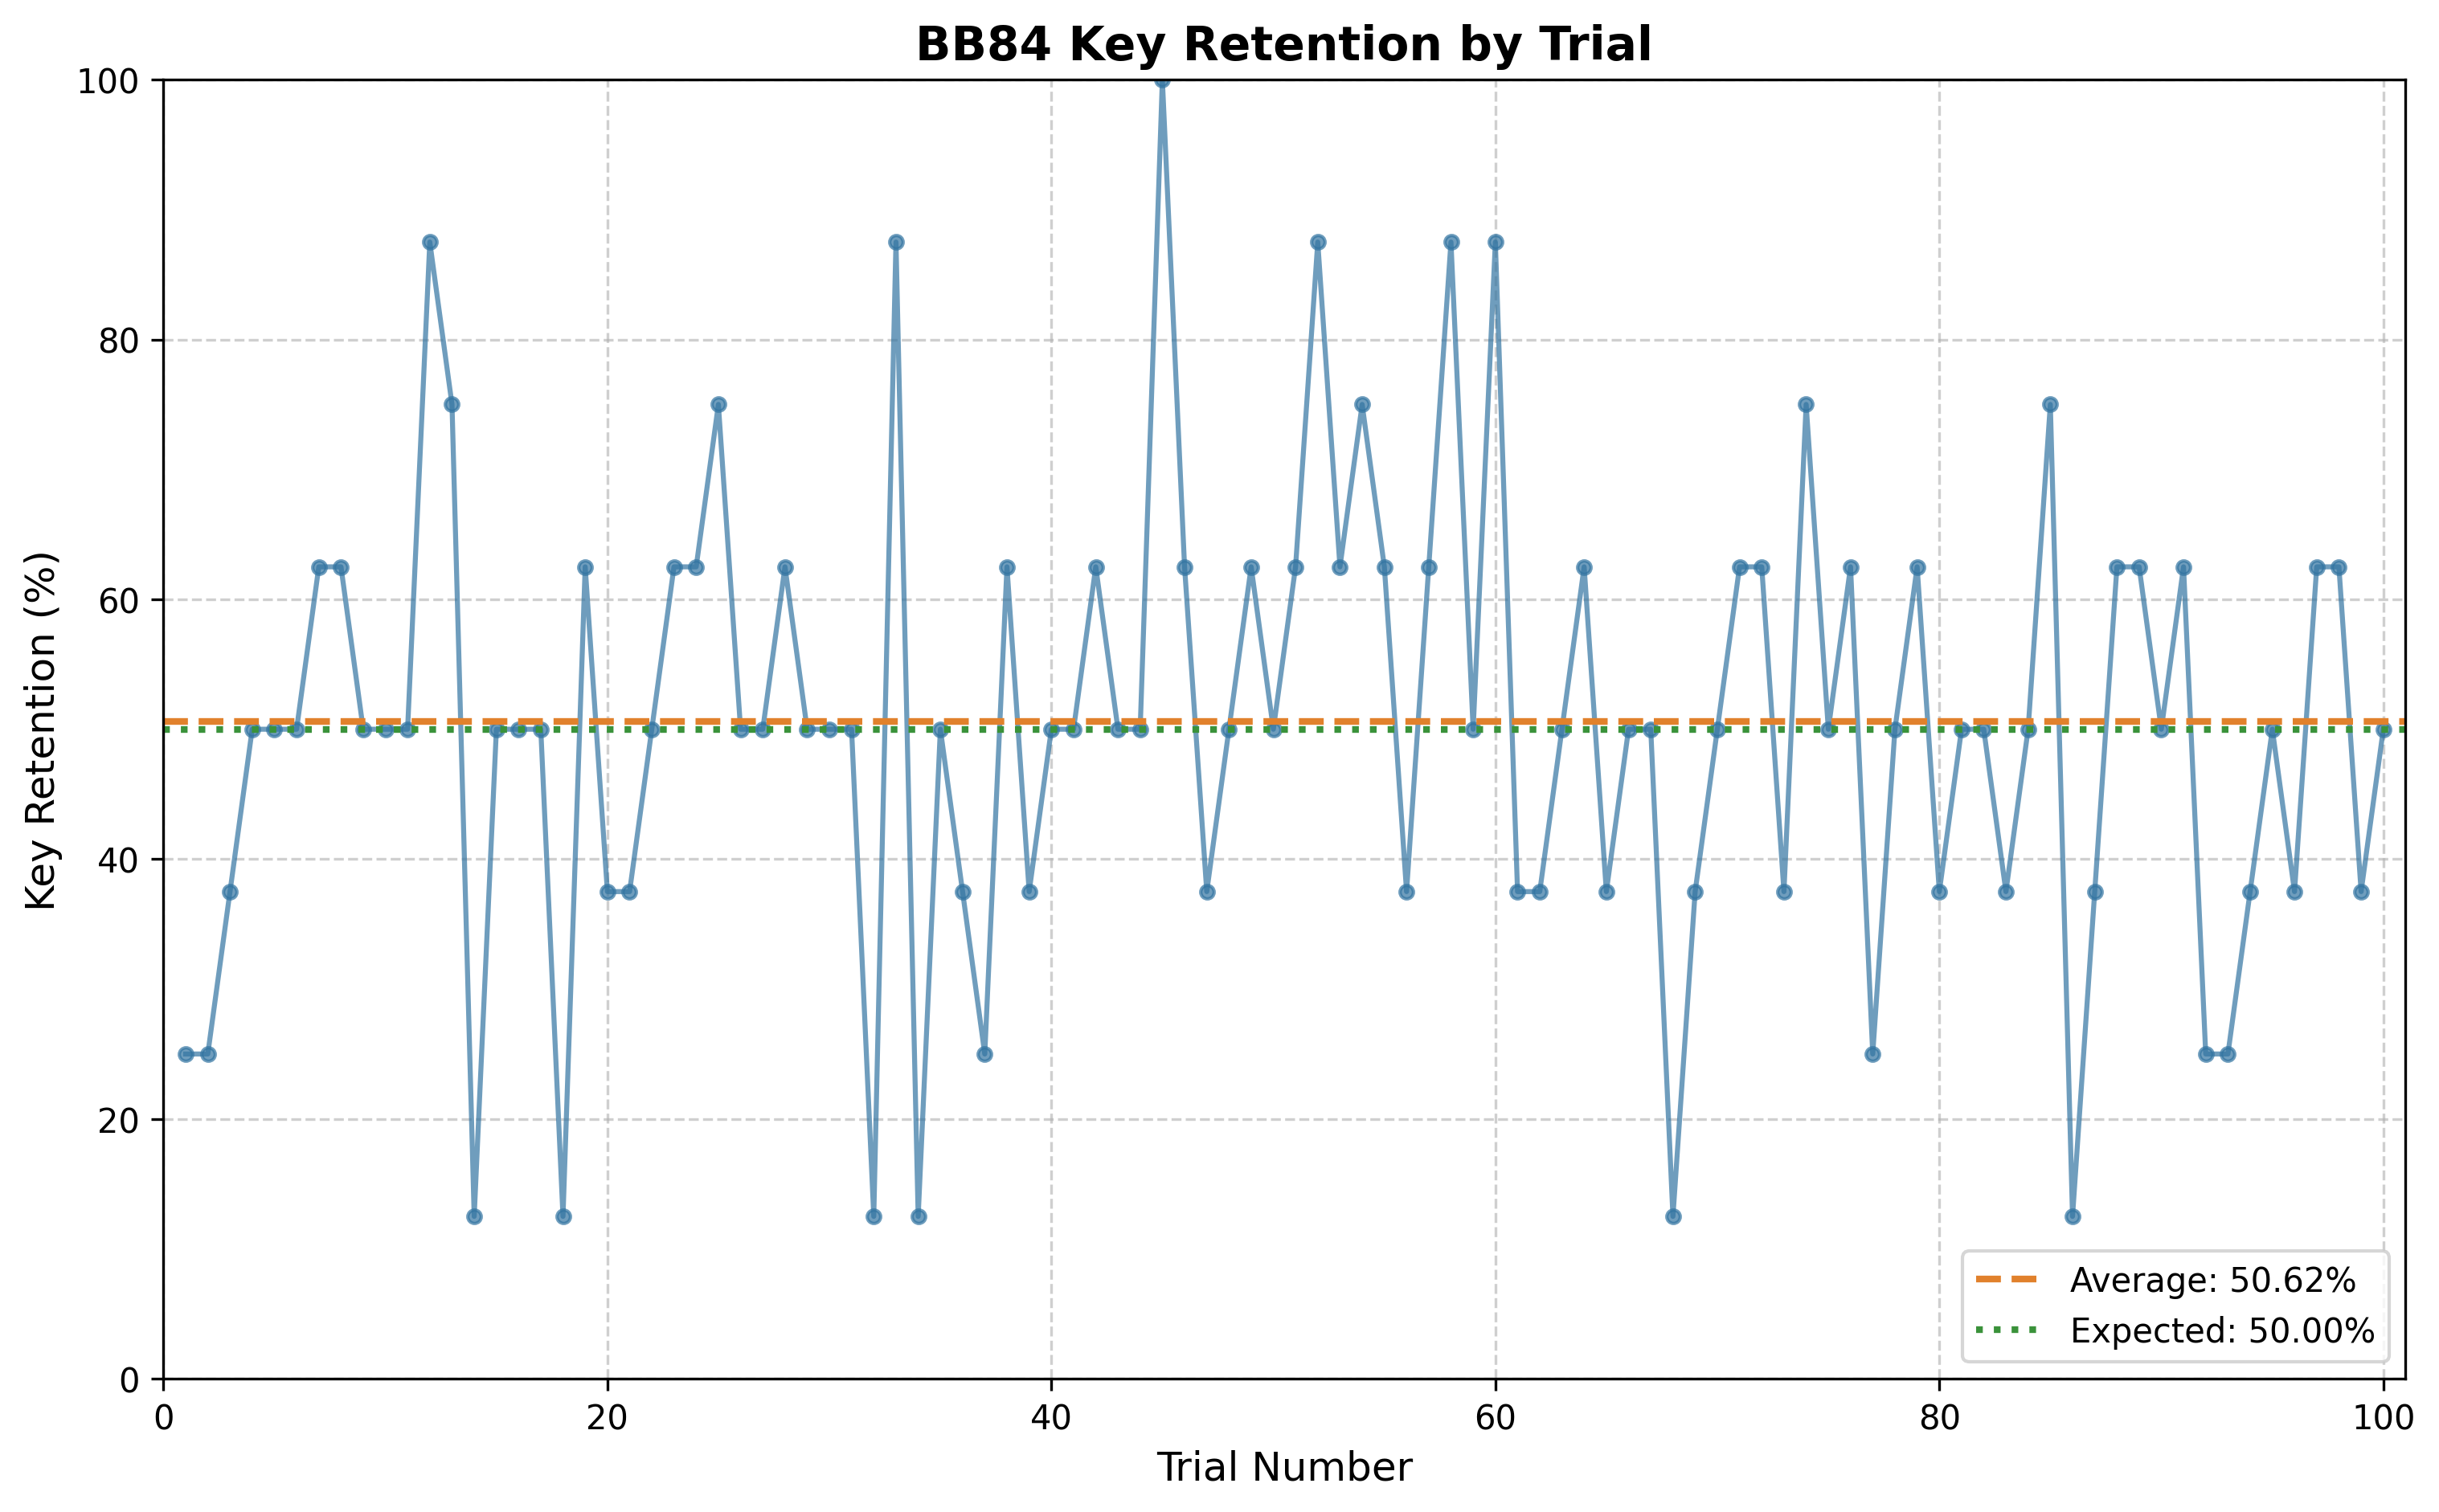

In [13]:
import numpy as np
import matplotlib.pyplot as plt

average_retention = np.mean(retention_rates)
print(f"Average Percentage of Key Bits Retained: {average_retention:.2f}%")

plt.figure(figsize=(12, 7), dpi=300)

# Plot: Individual trial results
trial_numbers = list(range(1, num_trials + 1))
plt.plot(trial_numbers, retention_rates, 'o-', markersize=4, color='#3274A1', alpha=0.7)
plt.axhline(y=average_retention, color='#E1812C', linestyle='--', linewidth=2, label=f'Average: {average_retention:.2f}%')
plt.axhline(y=50, color='#3A923A', linestyle=':', linewidth=2, label='Expected: 50.00%')

# Customize plot
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Key Retention (%)', fontsize=12)
plt.title('BB84 Key Retention by Trial', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 100)
plt.xlim(0, num_trials + 1)
plt.legend(loc='lower right')

# Save and show plot
plt.savefig('bb84_line_graph.png', dpi=300, bbox_inches='tight')
plt.show()


# Improved BB84

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
import hmac
import hashlib

In [15]:
len_message = 16  # Length of binary output

def hmac_prf(secret_key: str, message: bytes) -> str:
    """
    Generate HMAC using SHA-256 and return a binary output truncated to `len_message` bits.

    Args:
    - secret_key (str): Shared secret key.
    - message (bytes): Input message (previous value + seed + counter).

    Returns:
    - str: Binary string representation (16 bits).
    """
    hmac_output = hmac.new(secret_key.encode(),message, hashlib.sha256).hexdigest()
    binary_output = bin(int(hmac_output, 16))[2:].zfill(256)[:len_message]
    return binary_output

def binary_concat(*args) -> bytes:
    """
    Concatenate multiple binary elements.

    Args:
    - *args: List of elements (str or bytes).

    Returns:
    - bytes: Concatenated result.
    """
    return b''.join(arg.encode() if isinstance(arg, str) else arg for arg in args)

# In a real life setting, Alice and Bob send the new K and S through a channel and are not generated by a function
def update_key_and_seed(K: str, S: str) -> tuple:
    """
    Generate a new K and S using HMAC-PRF to ensure forward secrecy.

    Args:
    - K (str): Previous secret key.
    - S (str): Previous seed.

    Returns:
    - (new_K, new_S): Tuple of updated K and S as hexadecimal strings.
    """
    new_K = hmac_prf(K, b"update_key")
    new_S = hmac_prf(S, b"update_seed")
    return new_K, new_S

def generate_next_T(K: str, S: str, prev_T: str, round_num: int) -> str:
    """
    Generate the next T value dynamically based on the previous T.

    Args:
    - K (str): Current secret key.
    - S (str): Current seed.
    - prev_T (str): Previous T value.
    - round_num (int): Round number for counter.

    Returns:
    - str: New T value in binary.
    """
    counter = round_num.to_bytes(1, byteorder='big')
    next_T = hmac_prf(K, \
                      binary_concat(prev_T.encode(),\
                      S.encode(), counter))
    return next_T

In [16]:
# === Initialization ===
K = "shared_secret_key"
S = "shared_seed"
prev_T = "0000000000000000"

# === Run a single round and show changes ===
round_number = 1
print(f"Round {round_number}:")
print(f"  Initial K  = {K}")
print(f"  Initial S  = {S}")

# Generate new T
new_T = generate_next_T(K, S, prev_T, round_number)
print(f"  Generated T{round_number} = {new_T}")

# Update K and S for the next round
K, S = update_key_and_seed(K, S)
print(f"  Updated K  = {K}")
print(f"  Updated S  = {S}")

Round 1:
  Initial K  = shared_secret_key
  Initial S  = shared_seed
  Generated T1 = 0100100001110000
  Updated K  = 1100100011101110
  Updated S  = 0111010110100001


## Both Alice and Bob with same bases

In [17]:
alice_bases = bob_bases = new_T

In [18]:
token= "90c11c3427d32b9170daa73f5fffe26dc68634b8b6f0d8e5a83082726bd42c2d384e16c5ea3f3ed03f5cb71156de8fb4ba9b3880f9f990c6ed2d275f315de5d3"
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum",
  overwrite=True
)


In [19]:
service = QiskitRuntimeService()
n_qubits = 5
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=n_qubits)
print("Selected Backend", backend)

Selected Backend <IBMBackend('ibm_sherbrooke')>


In [26]:
# Function to generate a random binary string using quantum circuits
def RandomStringIBM(str_len):
    op_str = ''  # Initialize an empty output string
    num_qbits = 16  # Define number of qubits

    # Calculate the number of chunks needed
    num_chunks = math.ceil(str_len / num_qbits)
    for _ in range(num_chunks):
        # Create a quantum register and a classical register
        q = QuantumRegister(num_qbits)
        c = ClassicalRegister(num_qbits)
        QC = QuantumCircuit(q, c)

        # Apply Hadamard gates to all qubits to create superposition
        for i in range(num_qbits):
            QC.h(q[i])
        QC.measure(q, c)
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        isa_circuit = pm.run(QC)

        sampler = Sampler(backend)
        job = sampler.run([isa_circuit])
        print(job.job_id)
        job_result = job.result()
        data = job_result[0].data
        bitarray = next(iter(data.values()))
        counts = bitarray.get_counts()
        result = next(iter(counts.keys()))

        return result

In [27]:
len_message = 16
alice_key = RandomStringIBM(len_message)

<bound method BasePrimitiveJob.job_id of <RuntimeJobV2('cz0v97c39f40008rsjg0', 'sampler')>>


In [31]:
print(alice_key)

1111110011000001


### Retrieving Results Using Job ID

When the workload is high, accessing runtime may not be immediately possible, as jobs are placed in a queue. In such cases, you can use the job ID to retrieve the results once the job is completed

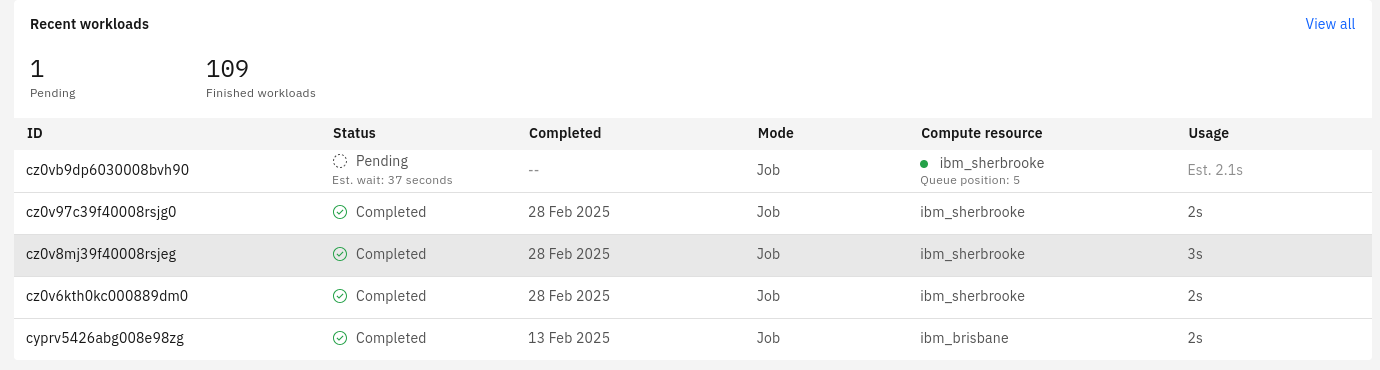

In [32]:
job_id = 'cz0v97c39f40008rsjg0'
job = service.job(job_id)
result = job.result()
data = result[0].data
bitarray = next(iter(data.values()))
counts = bitarray.get_counts()
alice_key = next(iter(counts.keys()))
print(alice_key)

1111110011000001


In [33]:
# Quantum Circuit for encoding
q = QuantumRegister(len_message)
c = ClassicalRegister(len_message)
qc = QuantumCircuit(q, c)

# Encode qubits based on Alice's key and basis
for i in range(len_message):
    if alice_key[i] == '1':
        qc.x(q[i])  # Flip the qubit to 1 if key is 1
    if alice_bases[i] == '1':
        qc.h(q[i])  # Apply Hadamard gate if basis is 1
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=16, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(16, 'q712'), 0), Qubit(QuantumRegister(16, 'q712'), 1), Qubit(QuantumRegister(16, 'q712'), 2), Qubit(QuantumRegister(16, 'q712'), 3), Qubit(QuantumRegister(16, 'q712'), 4), Qubit(QuantumRegister(16, 'q712'), 5), Qubit(QuantumRegister(16, 'q712'), 6), Qubit(QuantumRegister(16, 'q712'), 7), Qubit(QuantumRegister(16, 'q712'), 8), Qubit(QuantumRegister(16, 'q712'), 9), Qubit(QuantumRegister(16, 'q712'), 10), Qubit(QuantumRegister(16, 'q712'), 11), Qubit(QuantumRegister(16, 'q712'), 12), Qubit(QuantumRegister(16, 'q712'), 13), Qubit(QuantumRegister(16, 'q712'), 14), Qubit(QuantumRegister(16, 'q712'), 15)), clbits=())

In [34]:
# Step 3: Bob measures the qubits
for i in range(len_message):
    if bob_bases[i] == '1':
        qc.h(q[i])  # Bob applies Hadamard if measuring in Hadamard basis

# Add measurements
qc.measure(q, c)

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

sampler = Sampler(backend)
job = sampler.run([isa_circuit],shots=1)
result = job.result()

In [ ]:
data = result[0].data
bitarray = next(iter(data.values()))
counts = bitarray.get_counts()

In [ ]:
bob_result = next(iter(counts.keys()))
print(bob_result)

In [ ]:
print((alice_bases))
print((bob_bases))
print((alice_key))
print((bob_result))


In [ ]:
# Display matching bits for shared key
shared_key = []
for i in range(len_message):
    if alice_bases[i] == bob_bases[i]:  # Only keep the bit if bases match
        shared_key.append(bob_result[len_message - i - 1])  # Reverse order in Qiskit

final_shared_key = ''.join(shared_key)
print('Final Shared Key:', final_shared_key)

# Calculate the percentage of key bits retained
matching_bits_count = len(final_shared_key)
percentage_retained = (matching_bits_count / len_message) * 100
print("Percentage of key bits retained: ", percentage_retained, "%")